
<br>
<br>
<div>
<img  style="float: left; padding-right: 100px; width: 350px" src="./logo.png">
    </div>
    <br>
    <h3 align="center">AI4D LAB TRAINING</h3>
<hr>
<br>
<h4 align="center"><a href="https://nsoma.me">Zephania Reuben</a></h4>
<br>
<h4 align="center">July 18, 2023</h4>
<br>
<hr>
<h3 align="center">DATA SCIENCE | TASK</h3>
<hr>
<br>

<h3 align="center"> FINANCIAL INCLUSSION IN AFRICA - ZINDI COMPETITION </h3>

### Understand The Problem Statement

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa, and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enable households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other finance services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The objective of this Dataset is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

Data source available in the the zindi platform, [Zindi Africa](https://zindi.africa/competitions/financial-inclusion-in-africa)

### Hypothesis Generation
This is a very important stage in any data science/machine learning pipeline. It involves understanding the problem in detail by brainstorming as many factors as possible which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data.

Below are some of the factors which I think can affect the chance for a person to have a bank account

- People who have mobile phone have lower chance to use bank account because of mobile money services.
- People who are employed have a higher chance of having a bank account than People who are unemployed.
- People with low education have low chance to have bank account
- People in rural areas have low chance to have bank account 
- People who have age below 18 have low chance to have bank account
- Female have less chance to have bank account

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [51]:
# Load files into a pandas dataframe
train = pd.read_csv(r'C:\Users\user\Desktop\New\financial-inclusion-in-africa\Train.csv')

Credit: [Davis David](https://twitter.com/Davis_McDavid)

In [5]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# shows shapes of the datasets
print(train.shape)

(23524, 13)


In [7]:
train.head(6)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed


from the datasets above, test datasets has no bank account columns so we are going to use the train datasets

Let's show the Relationships 

 1) People who have mobile phones have lower chance to use bank account because of mobile money services

In [8]:
bank_cell=train.groupby('bank_account')['cellphone_access'].value_counts()

In [9]:
print(bank_cell)

bank_account  cellphone_access
No            Yes                 14246
              No                   5966
Yes           Yes                  3208
              No                    104
Name: count, dtype: int64


<Axes: title={'center': 'Relationship between bank_account,cellphone_access'}, xlabel='bank_account,cellphone_access'>

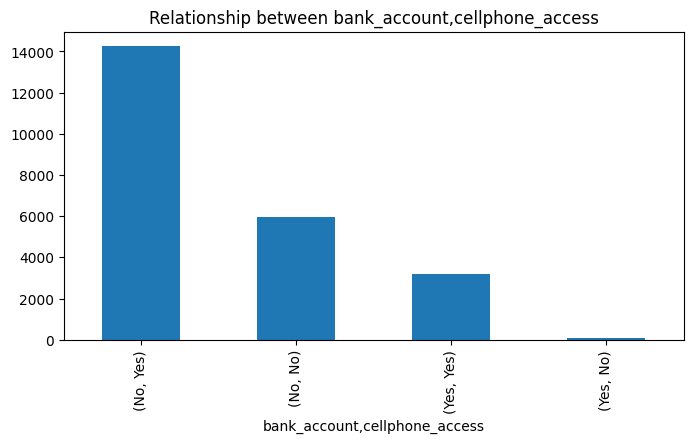

In [10]:
bank_cell.plot(kind='bar', figsize=(8,4), title='Relationship between bank_account,cellphone_access')

2) People who are employed have a higher chance of having a bank account than People who are unemployed.

In [11]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [12]:
bank_job=train.groupby('bank_account')['job_type'].value_counts()

In [13]:
print(bank_job)

bank_account  job_type                    
No            Self employed                   5589
              Informally employed             5152
              Farming and Fishing             4806
              Remittance Dependent            2287
              Other Income                     884
              No Income                        614
              Formally employed Private        484
              Government Dependent             197
              Dont Know/Refuse to answer       112
              Formally employed Government      87
Yes           Self employed                    848
              Farming and Fishing              635
              Formally employed Private        571
              Informally employed              445
              Formally employed Government     300
              Remittance Dependent             240
              Other Income                     196
              Government Dependent              50
              Dont Know/Refuse to answe

<Axes: title={'center': 'Relationshi[p between job_type and bank_account'}, xlabel='bank_account,job_type'>

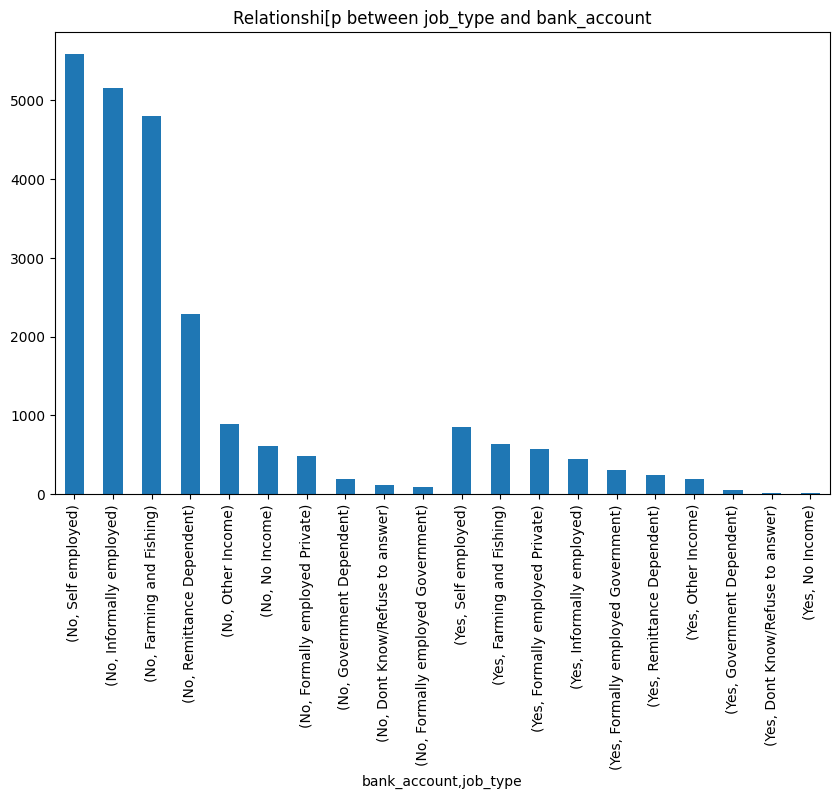

In [14]:
bank_job.plot(kind='bar', figsize=(10,6), title='Relationshi[p between job_type and bank_account')

3) people with low education have low chance to have bank account

In [15]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [16]:
bank_edc=train.groupby('bank_account')['education_level'].value_counts()

In [17]:
print(bank_edc)

bank_account  education_level                
No            Primary education                  11698
              No formal education                 4339
              Secondary education                 3240
              Tertiary education                   566
              Vocational/Specialised training      345
              Other/Dont know/RTA                   24
Yes           Primary education                   1093
              Secondary education                  983
              Tertiary education                   591
              Vocational/Specialised training      458
              No formal education                  176
              Other/Dont know/RTA                   11
Name: count, dtype: int64


<Axes: title={'center': 'Relationship between bank_account and education_level'}, xlabel='bank_account,education_level'>

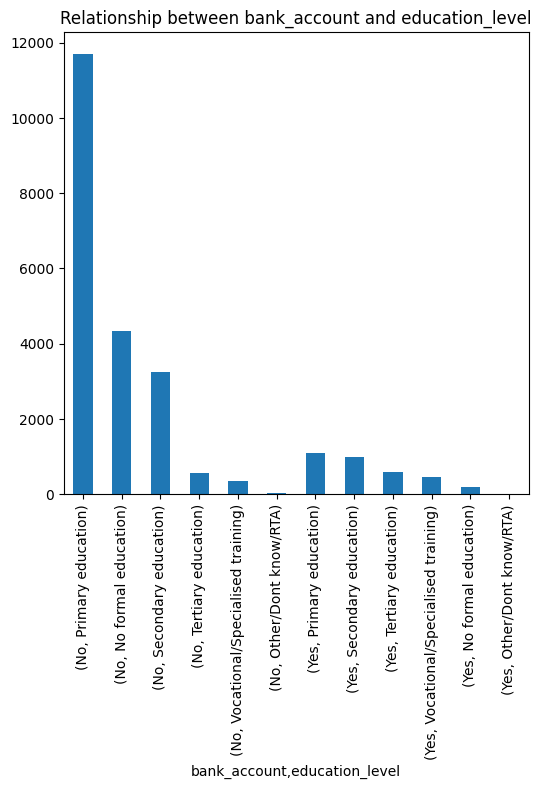

In [18]:
bank_edc.plot(kind='bar', figsize=(6,6), title='Relationship between bank_account and education_level')

4) people in rural areas have low chance to have bank account

In [19]:
bank_rural=train.groupby('bank_account')['location_type'].value_counts()

<Axes: title={'center': 'Relationship between rural and bank_account'}, xlabel='bank_account,location_type'>

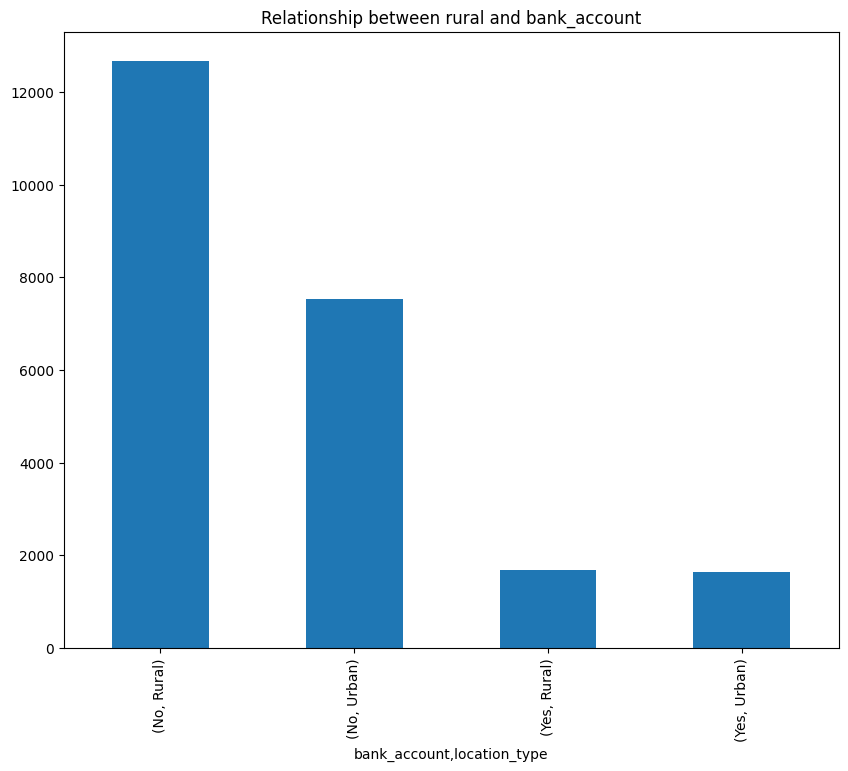

In [20]:
bank_rural.plot(kind='bar', figsize=(10,8), title='Relationship between rural and bank_account')

5) people who have age below 18 have low chance to have bank account

In [21]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [22]:
bank_age=train.groupby('bank_account')['age_of_respondent'].value_counts()

In [23]:
print(bank_age)

bank_account  age_of_respondent
No            30                   879
              35                   700
              25                   675
              28                   623
              20                   590
                                  ... 
Yes           88                     2
              87                     1
              89                     1
              90                     1
              93                     1
Name: count, Length: 162, dtype: int64


<Axes: title={'center': 'Relationship between age and bank_account'}, xlabel='bank_account,age_of_respondent'>

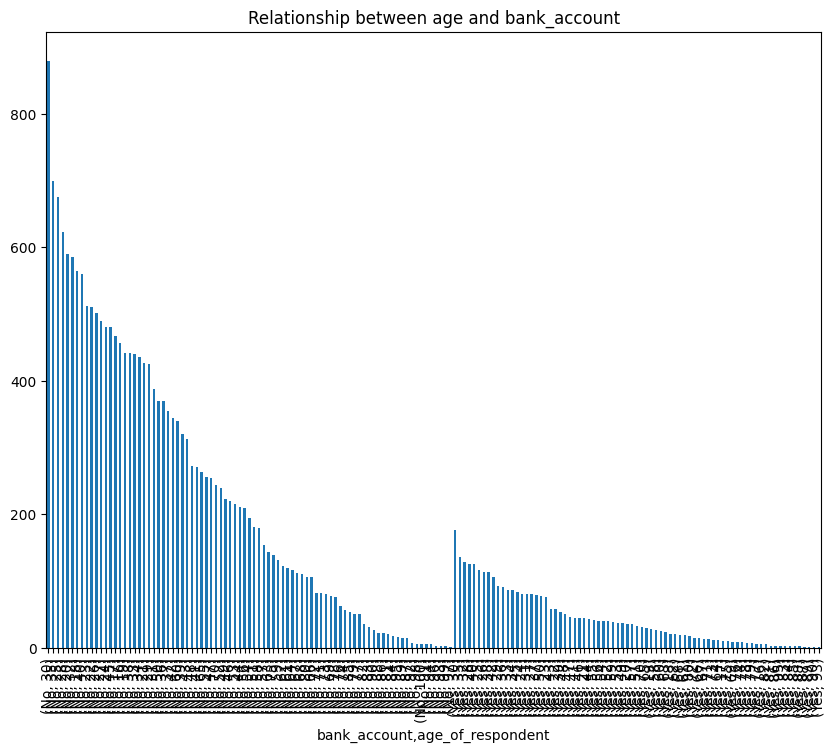

In [24]:
bank_age.plot(kind='bar', figsize=(10,8), title='Relationship between age and bank_account')

6) female have less chance to have bank account

In [25]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [26]:
bank_gend=train.groupby('bank_account')['gender_of_respondent'].value_counts()

In [27]:
print(bank_gend)

bank_account  gender_of_respondent
No            Female                  12395
              Male                     7817
Yes           Male                     1830
              Female                   1482
Name: count, dtype: int64


<Axes: title={'center': 'Relationship between gender and bank_account'}, xlabel='bank_account,gender_of_respondent'>

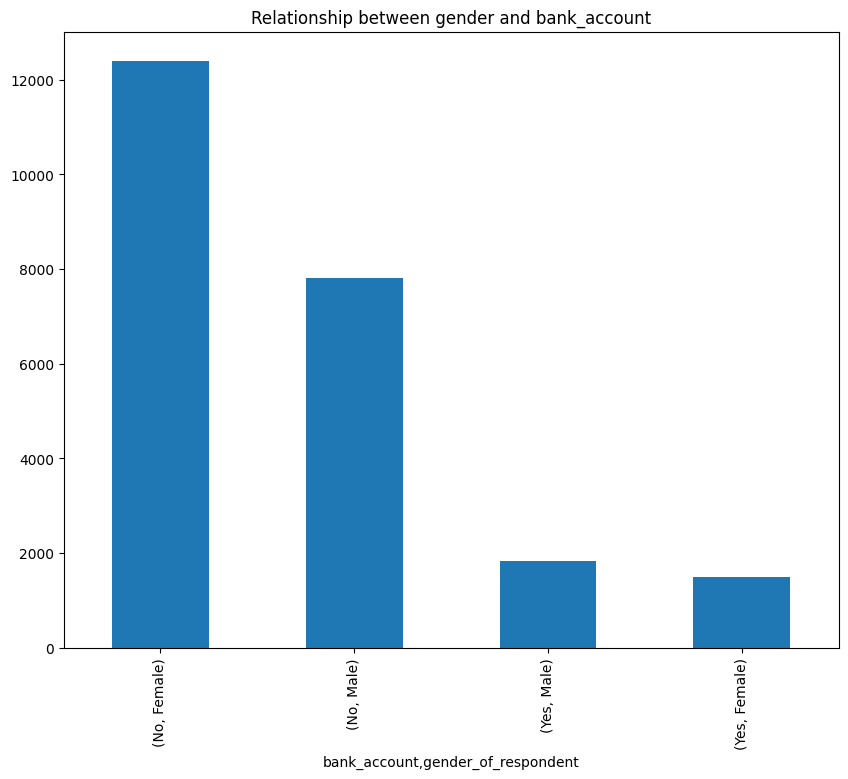

In [28]:
bank_gend.plot(kind='bar', figsize=(10,8), title='Relationship between gender and bank_account')

In [29]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


Accuracy: 0.88
              precision    recall  f1-score   support

          No       0.89      0.98      0.93      4063
         Yes       0.67      0.23      0.34       642

    accuracy                           0.88      4705
   macro avg       0.78      0.61      0.64      4705
weighted avg       0.86      0.88      0.85      4705



In [52]:
#data preprocessing
X = train.drop('bank_account', axis=1)
y = train['bank_account']


In [53]:
#encode the categorical attributes
label_encoder = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

In [54]:
#scalling the model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [56]:
# Step 5: Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [57]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.88


In [58]:
# Classification Report provides more insights on precision, recall, and F1-score for each class
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.89      0.98      0.93      4063
         Yes       0.67      0.23      0.34       642

    accuracy                           0.88      4705
   macro avg       0.78      0.61      0.64      4705
weighted avg       0.86      0.88      0.85      4705



In [60]:
print(y_pred)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [63]:
#measure performance of the model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

ValueError: could not convert string to float: 'No'

In [45]:
trainee=train.drop(['country','bank_account','location_type','gender_of_respondent','cellphone_access','relationship_with_head', 'uniqueid','marital_status','education_level','job_type'], axis=1)

In [46]:
trainee

,year,household_size,age_of_respondent
0,2018,3,24
1,2018,5,70
2,2018,5,26
3,2018,5,34
4,2018,8,26
...,...,...,...
23519,2018,4,48
23520,2018,2,27
23521,2018,5,27
23522,2018,7,30


In [44]:
#Transform columns into numerical form
Country=pd.get_dummies(train['country']).replace([True,False],[1,0])
#unique_id = pd.get_dummies(train['uniqueid']).replace([True,False],[1,0])
locationtype= pd.get_dummies(train['location_type']).replace([True,False],[1,0])
cellphoneaccess = pd.get_dummies(train['cellphone_access']).replace([True,False],[1,0])
genderofrespondent= pd.get_dummies(train['gender_of_respondent']).replace([True,False],[1,0])
relationshipwithhead=pd.get_dummies(train['relationship_with_head']).replace([True,False],[1,0])
maritalstatus= pd.get_dummies(train['marital_status']).replace([True,False],[1,0])
educationlevel= pd.get_dummies(train['education_level']).replace([True,False],[1,0])
jobtype= pd.get_dummies(train['job_type']).replace([True,False],[1,0])

In [37]:
locationtype

,Rural,Urban
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
23519,1,0
23520,1,0
23521,1,0
23522,0,1


In [49]:
concate = pd.concat([['Country', 'locationtype', 'cellphoneaccess', 'genderofrespondent', 'relationshipwithhead', 'maritalstatus', 'educationlevel', 'jobtype'],['year', 'houshold_size', 'age_with_respondent']], axis=1)

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid